# **Proyek NLP LSTM**

*   **Nama:** Venessa Yumadila Syahra
*   **ID Dicoding:** nessasyahra

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
import pandas as pd
data = pd.read_csv('bbc-text.csv')
data.tail()

,category,text
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...
2224,sport,souness delight at euro progress boss graeme s...


In [3]:
data.category.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

### Pre-processing

In [4]:
data['text'] = data['text'].astype(str)

In [5]:
# remove special characters
import re
data['text'] = data['text'].str.replace("[.,:;+!\-_<^/=?\"'\(\)\d\&*]", " ")

<ipython-input-5-19351c614ba9>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace("[.,:;+!\-_<^/=?\"'\(\)\d\&*]", " ")


In [6]:
# make all text lowercase
data['text'] = data['text'].apply(lambda x: x.lower())

In [7]:
# stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

remove = set(stopwords.words('english'))
tokens = word_tokenize(str(data['text']))
filtered = [w for w in tokens if not w.lower() in remove]

In [8]:
# tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=50000, oov_token='<oov>')
tokenizer.fit_on_texts(data['text'].values)

x = tokenizer.texts_to_sequences(data['text'].values)
x = pad_sequences(x, maxlen=3000)

In [9]:
y = pd.get_dummies(data['category'], columns=data['category']).values

In [10]:
# split training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model

In [11]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(50000, 100, input_length=3000),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
from keras.callbacks import EarlyStopping
hist = model.fit(x_train, y_train, epochs=7, batch_size=64,
                 validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/7
28/28 [==============================] - 287s 10s/step - loss: 1.5945 - accuracy: 0.2629 - val_loss: 1.5602 - val_accuracy: 0.3416
Epoch 2/7
28/28 [==============================] - 285s 10s/step - loss: 1.4304 - accuracy: 0.5506 - val_loss: 1.2735 - val_accuracy: 0.5978
Epoch 3/7
28/28 [==============================] - 281s 10s/step - loss: 0.9989 - accuracy: 0.5882 - val_loss: 0.9758 - val_accuracy: 0.5146
Epoch 4/7
28/28 [==============================] - 283s 10s/step - loss: 0.7278 - accuracy: 0.7309 - val_loss: 1.0719 - val_accuracy: 0.6921
Epoch 5/7
28/28 [==============================] - 291s 10s/step - loss: 0.6848 - accuracy: 0.7949 - val_loss: 0.7072 - val_accuracy: 0.7663
Epoch 6/7
28/28 [==============================] - 311s 11s/step - loss: 0.3624 - accuracy: 0.9275 - val_loss: 0.4140 - val_accuracy: 0.8854
Epoch 7/7
28/28 [==============================] - 333s 12s/step - loss: 0.1304 - accuracy: 0.9787 - val_loss: 0.4117 - val_accuracy: 0.8652


### Plot

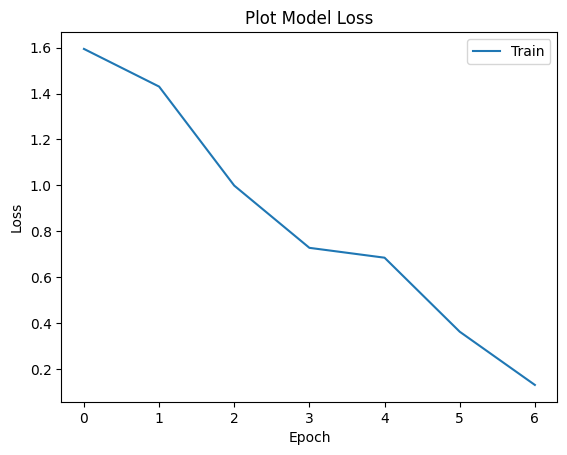

In [13]:
import matplotlib.pyplot as plt

# plot loss
plt.plot(hist.history['loss'])
plt.title('Plot Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

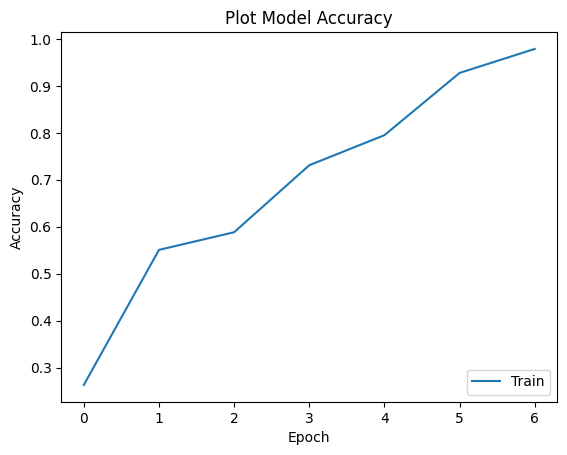

In [14]:
# plot akurasi
plt.plot(hist.history['accuracy'])
plt.title('Plot Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()